In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action ="ignore")
from sklearn import metrics




In [2]:
df = pd.read_csv("C:/Users/Meherab/Desktop/Thesis/Data set/fetal_health.csv")

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


In [4]:
df.mean(axis = 0)

baseline value                                            133.303857
accelerations                                               0.003178
fetal_movement                                              0.009481
uterine_contractions                                        0.004366
light_decelerations                                         0.001889
severe_decelerations                                        0.000003
prolongued_decelerations                                    0.000159
abnormal_short_term_variability                            46.990122
mean_value_of_short_term_variability                        1.332785
percentage_of_time_with_abnormal_long_term_variability      9.846660
mean_value_of_long_term_variability                         8.187629
histogram_width                                            70.445908
histogram_min                                              93.579492
histogram_max                                             164.025400
histogram_number_of_peaks         

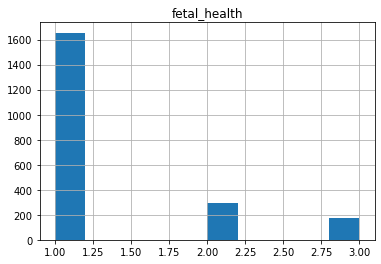

In [5]:
hist = df.hist('fetal_health')

In [6]:
normal_state = df[df.fetal_health==1]

In [7]:
normal_state.fetal_health.sum()

1655

In [8]:
sus_state = df[df.fetal_health==2]

In [9]:
sus_state.fetal_health.sum()

590

In [10]:
path_state = df[df.fetal_health==3]
path_state.fetal_health.sum()

528

<AxesSubplot:xlabel='baseline value', ylabel='fetal_health'>

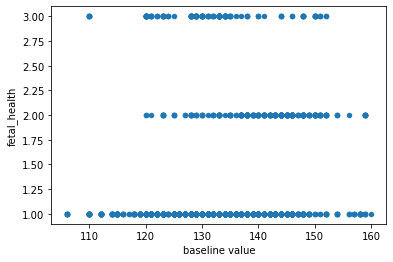

In [11]:
df.plot.scatter(x='baseline value',
               y= 'fetal_health')

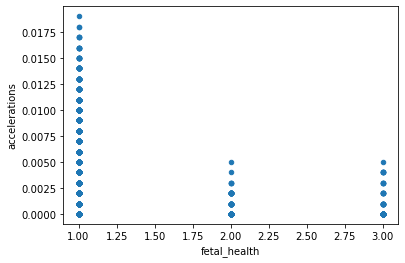

In [12]:
df.plot.scatter(x="fetal_health", y="accelerations");

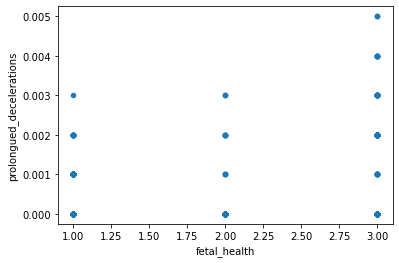

In [13]:
df.plot.scatter(x="fetal_health", y="prolongued_decelerations");

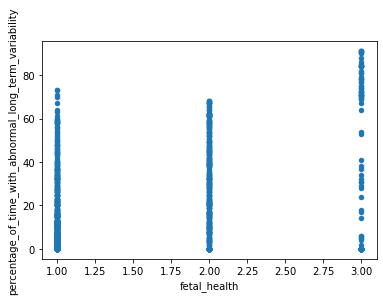

In [14]:
df.plot.scatter(x="fetal_health", y="percentage_of_time_with_abnormal_long_term_variability");

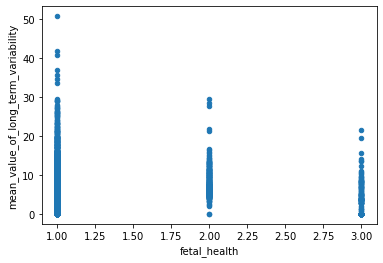

In [15]:
df.plot.scatter(x="fetal_health", y="mean_value_of_long_term_variability");

In [16]:
df.shape

(2126, 22)

In [17]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

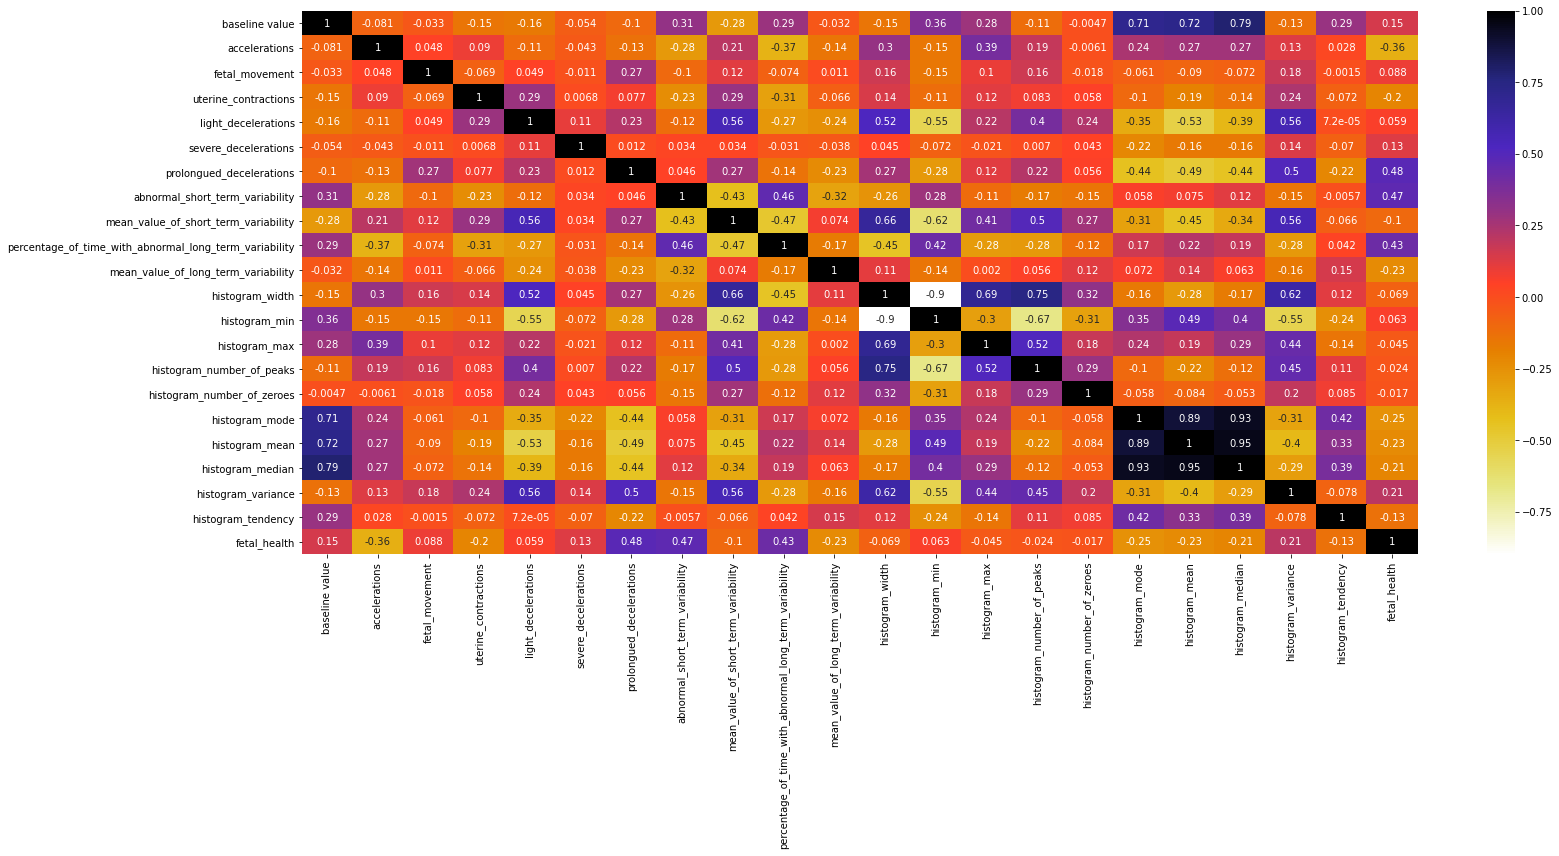

In [18]:
import seaborn as sns
plt.figure(figsize=(25,10))
cor=df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [19]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [20]:
corr_features = correlation(df, 0.85)
len(set(corr_features))

2

In [21]:
corr_features

{'histogram_mean', 'histogram_median'}

In [22]:
df=df.drop(['histogram_median'], axis=1)

In [23]:
df.dtypes

baseline value                                              int64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                             int64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability      int64
mean_value_of_long_term_variability                       float64
histogram_width                                             int64
histogram_min                                               int64
histogram_max                                               int64
histogram_number_of_peaks                                   int64
histogram_

In [24]:
df.isnull()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_variance,histogram_tendency,fetal_health
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2124,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
df = df.astype(float)

In [26]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [27]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [28]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,11.0,1.0,1.0


In [29]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,269.000000,1.000000,3.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 21 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x = df.drop('fetal_health', axis=1)
y = df['fetal_health']

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
print("x_train shape is:",x_train.shape)

x_train shape is: (1700, 20)


In [35]:
print("y_train shape is:",y_train.shape)

y_train shape is: (1700,)


In [36]:
print("x_test shape is:",x_test.shape)

x_test shape is: (426, 20)


In [37]:
print("y_test shape is:",y_test.shape)

y_test shape is: (426,)


In [38]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [39]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))

After OverSampling, the shape of train_X: (3987, 20)


In [40]:
print('Brfore OverSampling, the shape of train_X: {}'.format(x_train.shape))

Brfore OverSampling, the shape of train_X: (1700, 20)


In [41]:
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_y: (3987,) 



In [42]:
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

Before OverSampling, the shape of train_y: (1700,) 



In [43]:
res_normal_state = y_train_res[y_train_res]
y_train_res.sum()

7974.0

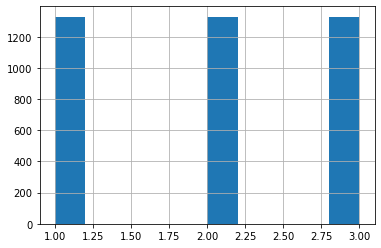

In [44]:
hist = y_train_res.hist()

In [45]:
res_sus_state = y_train_res[y_train_res==2.0]
res_sus_state.sum()

2658.0

In [46]:
normal_state = y_train_res[y_train_res==1.0]
normal_state.sum()

1329.0

In [47]:
res_path_state = y_train_res[y_train_res==3.0]
res_path_state.sum()

3987.0

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
RandomForestClassifierModel = RandomForestClassifier(n_estimators=100,max_depth=4,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(x_train_res, y_train_res)
y_train_pred=RandomForestClassifierModel.predict(x_train_res)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(x_train_res, y_train_res))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(x_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(x_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(x_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

RandomForestClassifierModel Train Score is :  0.9036869826937547
RandomForestClassifierModel Test Score is :  0.892018779342723
RandomForestClassifierModel features importances are :  [0.04683383 0.09475947 0.00627268 0.00928178 0.01222863 0.00036756
 0.07035677 0.16709584 0.08051158 0.12294785 0.0561283  0.01835894
 0.02091007 0.01464336 0.00359344 0.00297225 0.07883937 0.14806944
 0.03813341 0.00769542]
----------------------------------------------------
Predicted Value for RandomForestClassifierModel is :  [1. 1. 1. 2. 2. 1. 1. 1. 1. 2.]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.70291925 0.23075165 0.0663291 ]
 [0.78828267 0.15896654 0.05275079]
 [0.68195453 0.24123673 0.07680874]
 [0.14363869 0.70346496 0.15289635]
 [0.09775483 0.78635916 0.11588601]
 [0.8658813  0.12676328 0.00735542]
 [0.51324125 0.12763405 0.3591247 ]
 [0.71975974 0.237804   0.04243626]
 [0.8839444  0.08933431 0.02672128]
 [0.18371671 0.69462331 0.12165998]]


In [50]:
y_train_pred = RandomForestClassifierModel.predict(x_train_res) 

In [51]:
RandomForestClassifierModel.score(x_train_res, y_train_res)

0.9036869826937547

In [52]:
from sklearn.metrics import f1_score
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

RFscore = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('RF Score is : ', RFscore)

RF Score is :  0.892018779342723


In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
DecisionTreeClassifierModel = DecisionTreeClassifier(max_depth=2,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(x_train, y_train)

#Calculating Details
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(x_train_res, y_train_res))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(x_test, y_test))
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = DecisionTreeClassifierModel.predict(x_test)
y_pred_prob = DecisionTreeClassifierModel.predict_proba(x_test)
print('Predicted Value for DecisionTreeClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for DecisionTreeClassifierModel is : ' , y_pred_prob[:10])

DecisionTreeClassifierModel Train Score is :  0.8121394532229746
DecisionTreeClassifierModel Test Score is :  0.8779342723004695
DecisionTreeClassifierModel Classes are :  [1. 2. 3.]
DecisionTreeClassifierModel feature importances are :  [0.         0.         0.         0.         0.         0.
 0.         0.         0.5130723  0.12379732 0.         0.
 0.         0.         0.         0.         0.         0.36313037
 0.         0.        ]
----------------------------------------------------
Predicted Value for DecisionTreeClassifierModel is :  [1. 1. 1. 2. 2. 1. 1. 1. 1. 2.]
Prediction Probabilities Value for DecisionTreeClassifierModel is :  [[0.9370258  0.05311077 0.00986343]
 [0.9370258  0.05311077 0.00986343]
 [0.9370258  0.05311077 0.00986343]
 [0.31060606 0.625      0.06439394]
 [0.31060606 0.625      0.06439394]
 [0.9370258  0.05311077 0.00986343]
 [0.9370258  0.05311077 0.00986343]
 [0.9370258  0.05311077 0.00986343]
 [0.9370258  0.05311077 0.00986343]
 [0.31060606 0.625   

In [55]:
y_train_pred = DecisionTreeClassifierModel.predict(x_train_res) 

In [56]:
DecisionTreeClassifierModel.score(x_train_res, y_train_res)

0.8121394532229746

In [57]:
from sklearn.metrics import f1_score
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

DTScore = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('DT Score is : ', DTScore)

DT Score is :  0.8779342723004695


In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logreg = LogisticRegression()


In [60]:
logreg_mod=logreg.fit(x_train_res, y_train_res)

In [61]:
y_pred = logreg_mod.predict(x_test)

In [62]:
y_pred_prob = logreg.predict_proba(x_test)

In [63]:
print('Prediction Probabilities Value for Logistic Regression is : ' , y_pred_prob[:10])

Prediction Probabilities Value for Logistic Regression is :  [[8.82425065e-01 1.17442324e-01 1.32611190e-04]
 [8.10510640e-01 1.89011781e-01 4.77579365e-04]
 [2.06876880e-01 7.81051420e-01 1.20717004e-02]
 [3.61539755e-01 6.20830162e-01 1.76300827e-02]
 [2.30360141e-02 8.99988891e-01 7.69750950e-02]
 [9.58409626e-01 4.15783662e-02 1.20082215e-05]
 [5.75592124e-01 2.89292848e-01 1.35115028e-01]
 [9.70973402e-01 2.89866271e-02 3.99707032e-05]
 [8.68922238e-01 1.31075867e-01 1.89476899e-06]
 [6.02027068e-02 9.36175507e-01 3.62178579e-03]]


In [64]:
y_train_pred = logreg.predict(x_train_res) 

In [65]:
logreg.score(x_train_res, y_train_res)

0.800351141208929

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
LRscore= accuracy_score(y_test, y_pred) 

In [68]:
LRscore

0.7723004694835681

In [69]:
from sklearn import svm

In [70]:
from sklearn.svm import LinearSVC

In [71]:
SVM_model = svm.SVC(kernel='rbf', gamma='auto', C=2)

In [72]:
SVM_model.fit(x_train_res, y_train_res)

SVC(C=2, gamma='auto')

In [73]:
y_pred = SVM_model.predict(x_test)

In [74]:
y_train_pred = SVM_model.predict(x_train_res)

In [89]:
SVM_model.score(x_train_res, y_train_res)

0.9984951091045899

In [76]:
SVMscore= accuracy_score(y_test, y_pred) 

In [77]:
SVMscore

0.8215962441314554

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn = KNeighborsClassifier()


In [80]:
knn_mod = knn.fit(x_train_res, y_train_res)

In [87]:
y_train_pred = knn_mod.predict(x_train_res)

In [88]:
knn_mod.score(x_train_res, y_train_res)

0.9678956608979182

In [82]:
y_pred = knn_mod.predict(x_test)

In [83]:
KNNscore= accuracy_score(y_test, y_pred) 

In [84]:
KNNscore

0.8568075117370892

In [85]:
Accuracy_Result=pd.DataFrame({'DT':DTScore , 'RF':RFscore,'LR':LRscore ,'KNN':[KNNscore], 'SVM':[SVMscore]})
Accuracy_Result

,DT,RF,LR,KNN,SVM
0,0.877934,0.892019,0.7723,0.856808,0.821596


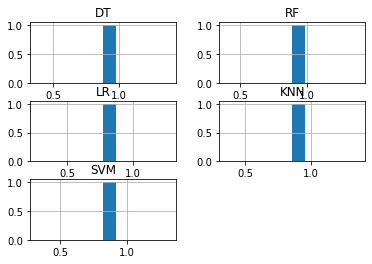

In [86]:
hist = Accuracy_Result.hist()